# Action-Based и Decision-Based Аналитика

### Data Exploration

In [1]:
import pandas as pd

# Load the dataset
ab_data = pd.read_csv('Retail_Data_Transactions.csv')
ab_data.head()

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78


In [2]:
ab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  125000 non-null  object
 1   trans_date   125000 non-null  object
 2   tran_amount  125000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.9+ MB


### Data Cleaning

In [3]:
missing_values = ab_data.isnull().sum()
duplicates = ab_data.duplicated().sum()
missing_values, duplicates

(customer_id    0
 trans_date     0
 tran_amount    0
 dtype: int64,
 6)

### Data Analysis

In [4]:
group_counts = ab_data['trans_date'].value_counts()
conversion_rate = ab_data.groupby('trans_date')['tran_amount'].mean()
group_counts, conversion_rate

(16-Jul-11    141
 18-Sep-11    124
 15-Apr-14    124
 11-Aug-11    122
 11-Mar-13    121
             ... 
 18-Jan-15     63
 04-Dec-13     62
 18-Aug-12     60
 17-Jan-15     58
 26-Feb-14     55
 Name: trans_date, Length: 1401, dtype: int64,
 trans_date
 01-Apr-12    64.119048
 01-Apr-13    62.000000
 01-Apr-14    66.781250
 01-Aug-11    65.911765
 01-Aug-12    64.879518
                ...    
 31-May-14    64.880000
 31-Oct-11    64.390805
 31-Oct-12    61.141304
 31-Oct-13    63.413043
 31-Oct-14    64.283784
 Name: tran_amount, Length: 1401, dtype: float64)

In [5]:
group_counts = ab_data['customer_id'].value_counts()
conversion_rate = ab_data.groupby('customer_id')['tran_amount'].mean()
conversion_count=ab_data.groupby('customer_id')['tran_amount'].count()
group_counts, conversion_rate.min(),conversion_rate.max(), conversion_count.min(), conversion_count.max()

(CS4424    39
 CS4320    38
 CS3799    36
 CS1215    35
 CS5109    35
           ..
 CS8559     4
 CS7716     4
 CS8376     4
 CS7224     4
 CS7333     4
 Name: customer_id, Length: 6889, dtype: int64,
 26.7,
 87.4,
 4,
 39)

### Statistical Testing

In [6]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(ab_data['trans_date'], ab_data['tran_amount'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
chi2, p_value

(133075.2561205344, 0.44149481628064347)

In [7]:
contingency_table = pd.crosstab(ab_data['customer_id'], ab_data['tran_amount'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
chi2, p_value

(741214.0145303321, 0.0)

In [8]:
import scipy.stats as stats
t_stat, p_value = stats.ttest_ind(conversion_rate, conversion_count,equal_var=True)
t_stat, p_value

(276.96338904841895, 0.0)

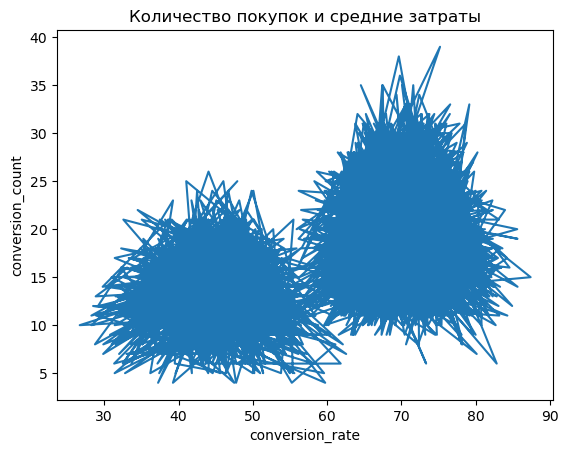

In [9]:
from matplotlib import pyplot as plt
plt.plot(conversion_rate,conversion_count)

plt.title("Количество покупок и средние затраты")
plt.ylabel('conversion_count')
plt.xlabel('conversion_rate')
plt.show()



## Decision-Based Analytics

### Data Exploration

In [11]:
retail_data = pd.read_csv('Retail_Data_Transactions.csv')
retail_data.head()

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78


## Decision-Based Analytics

K-means

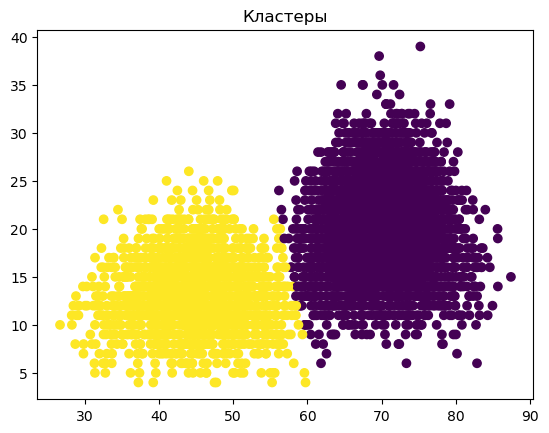

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
ab_data = pd.read_csv('Retail_Data_Transactions.csv')
group_counts = ab_data['customer_id'].value_counts()
conversion_rate = ab_data.groupby('customer_id')['tran_amount'].mean()
conversion_rate =pd.DataFrame(conversion_rate)
conversion_rate.rename(columns = {'tran_amount': 'tran_mean'}, inplace = True)
conversion_count=ab_data.groupby('customer_id')['tran_amount'].count()
conversion_count=pd.DataFrame(conversion_count)
conversion_count.rename(columns = {'tran_amount': 'tran_count'}, inplace = True)
row_data=pd.concat([conversion_rate,conversion_count],axis=1,ignore_index=False)
rd=np.array(row_data)
model = KMeans(n_clusters=2)
model.fit(rd)
model.labels_,model.cluster_centers_
f, (ax1) = plt.subplots()
ax1.set_title('Кластеры')
ax1.scatter(rd[:,0], rd[:,1],c=model.labels_)
